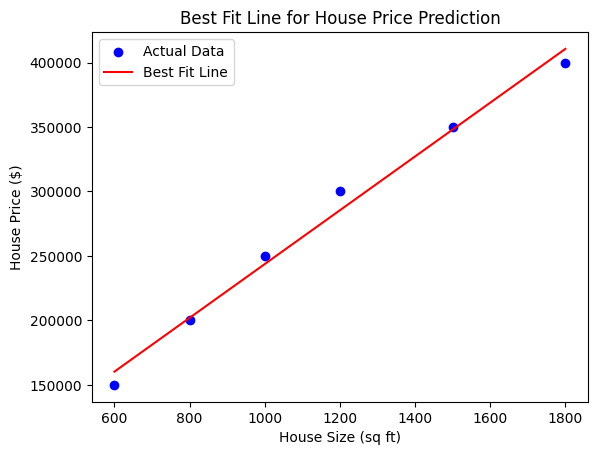

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Sample data: House size (X) and price (Y)
X = np.array([600, 800, 1000, 1200, 1500, 1800]).reshape(-1, 1)
Y = np.array([150000, 200000, 250000, 300000, 350000, 400000])
# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)
# Plot data points
plt.scatter(X, Y, color='blue', label="Actual Data")

# Plot best fit line
plt.plot(X, Y_pred, color='red', label="Best Fit Line")

plt.xlabel("House Size (sq ft)")
plt.ylabel("House Price ($)")
plt.title("Best Fit Line for House Price Prediction")
plt.legend()
plt.show()


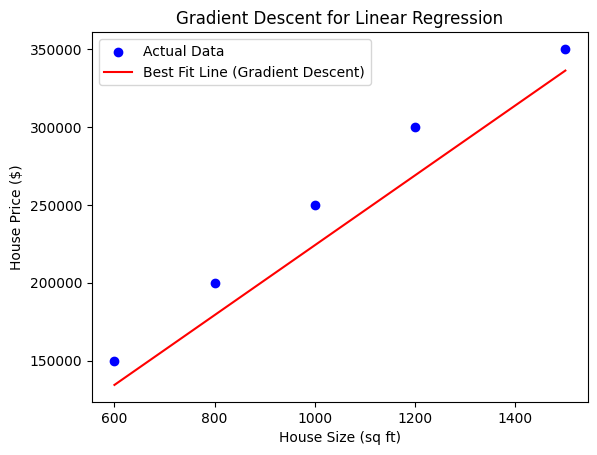

Final Slope (m): 224.07524374035654
Final Intercept (c): 2.3449423135842107


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example Dataset (House Size vs. Price)
X = np.array([600, 800, 1000, 1200, 1500]).reshape(-1, 1)  # Feature (house size)
Y = np.array([150000, 200000, 250000, 300000, 350000])     # Target (price)

# Gradient Descent Function
def gradient_descent(X, Y, learning_rate=0.00000001, epochs=1000):
    m, c = 0, 0  # Initialize parameters
    n = len(Y)   # Number of data points

    for _ in range(epochs):
        Y_pred = m * X + c  # Predicted values
        error = Y_pred - Y   # Error

        # Compute gradients
        dm = (2/n) * np.sum(error * X)  # Derivative w.r.t m
        dc = (2/n) * np.sum(error)      # Derivative w.r.t c

        # Update parameters
        m -= learning_rate * dm
        c -= learning_rate * dc

    return m, c

# Train Model
m, c = gradient_descent(X, Y)

# Make Predictions
Y_pred = m * X + c

# Plot Results
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, Y_pred, color='red', label="Best Fit Line (Gradient Descent)")
plt.xlabel("House Size (sq ft)")
plt.ylabel("House Price ($)")
plt.title("Gradient Descent for Linear Regression")
plt.legend()
plt.show()

print(f"Final Slope (m): {m}")
print(f"Final Intercept (c): {c}")


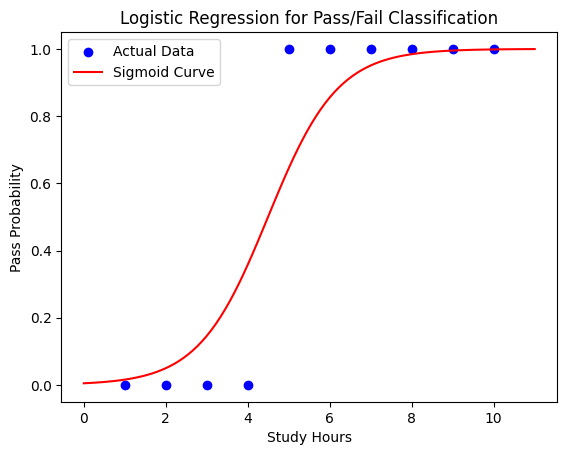

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Example Dataset (Study Hours vs. Pass/Fail)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Study hours
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Pass(1) or Fail(0)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X, Y)

# Predict Values
X_test = np.linspace(0, 11, 100).reshape(-1, 1)  # Test values for prediction
Y_pred = model.predict_proba(X_test)[:, 1]  # Probability of passing

# Plot Results
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X_test, Y_pred, color='red', label="Sigmoid Curve")
plt.xlabel("Study Hours")
plt.ylabel("Pass Probability")
plt.title("Logistic Regression for Pass/Fail Classification")
plt.legend()
plt.show()


Prediction for a student who studied 4.5 hours: Fail


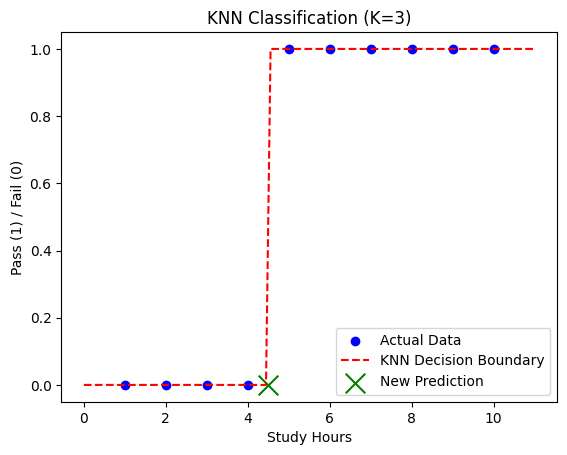

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Example Dataset (Study Hours vs. Pass/Fail)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Study hours
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Pass(1) or Fail(0)

# Train KNN Model
k = 3  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X, Y)

# Predict a new student who studied 4.5 hours
new_study_hours = np.array([[4.5]])
prediction = model.predict(new_study_hours)
print(f"Prediction for a student who studied 4.5 hours: {'Pass' if prediction[0] == 1 else 'Fail'}")

# Plot Decision Boundary
X_test = np.linspace(0, 11, 100).reshape(-1, 1)  # Test values
Y_pred = model.predict(X_test)  # Predictions

plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X_test, Y_pred, color='red', linestyle='dashed', label="KNN Decision Boundary")
plt.scatter(new_study_hours, prediction, color='green', label="New Prediction", marker='x', s=200)
plt.xlabel("Study Hours")
plt.ylabel("Pass (1) / Fail (0)")
plt.title(f"KNN Classification (K={k})")
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


Confusion Matrix:
 [[1 0]
 [1 0]]


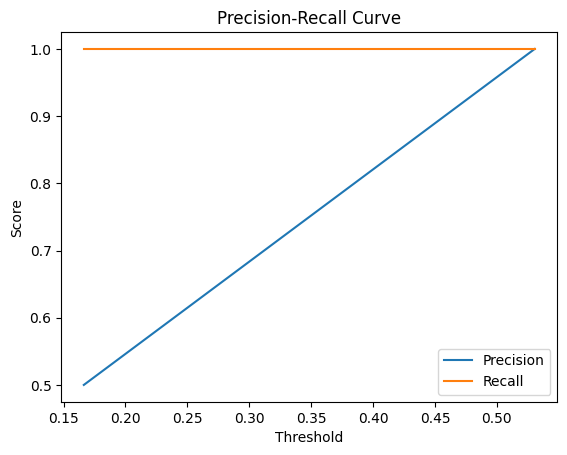

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Sample data (X: features, y: labels)
X = [[0, 1], [1, 1], [2, 2], [3, 3], [4, 5]]
y = [0, 0, 1, 1, 1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Set custom threshold (e.g., 0.7)
threshold = 0.7
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate results with confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", conf_matrix)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Example dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression()

# Train the base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)


from sklearn.ensemble import StackingClassifier

# Combine base models into a StackingClassifier
base_learners = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('lr', lr_model)
]
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)



accuracy = stacking_model.score(X_test, y_test)
print(f"Accuracy of Hybrid Model: {accuracy}")


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=3.